## Task 6.3 Geographical Visualizations with Python

### This script contains the following:
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

### Import data and libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import matplotlib.pyplot as plt

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
#Import JSON file
country_geo = r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\us-states.json'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
#Create path
path =r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data'

In [7]:
#Import data
df=pd.read_csv(r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\mortalityrate.csv',index_col=False)

### Data Wrangling

In [8]:
#Preview file
df.head()

,State,State Code,Race,Ten-Year Age Groups,Ten-Year Age Groups Code,Year,Gender,Gender Code,Deaths,Population,Death Proportion
0,Alabama,1,Asian or Pacific Islander,55-64 years,55-64,2017,Male,M,10,3373,0
1,Alabama,1,Asian or Pacific Islander,65-74 years,65-74,2017,Male,M,10,1711,1
2,Alabama,1,Asian or Pacific Islander,65-74 years,65-74,2020,Female,F,13,3339,0
3,Alabama,1,Asian or Pacific Islander,75-84 years,75-84,2016,Female,F,11,992,1
4,Alabama,1,Asian or Pacific Islander,75-84 years,75-84,2017,Female,F,10,1041,1


In [9]:
df.shape

(9487, 11)

In [10]:
# Select only the necessary columns and put them in a list called columns
columns = ["State",
           "Race",
           "Ten-Year Age Groups",
           "Year",
           "Gender",
            "Deaths",
            "Population",
            "Death Proportion"]

In [11]:
# Create a subset

df_1 = df[columns]

In [13]:
df_1.head()

,State,Race,Ten-Year Age Groups,Year,Gender,Deaths,Population,Death Proportion
0,Alabama,Asian or Pacific Islander,55-64 years,2017,Male,10,3373,0
1,Alabama,Asian or Pacific Islander,65-74 years,2017,Male,10,1711,1
2,Alabama,Asian or Pacific Islander,65-74 years,2020,Female,13,3339,0
3,Alabama,Asian or Pacific Islander,75-84 years,2016,Female,11,992,1
4,Alabama,Asian or Pacific Islander,75-84 years,2017,Female,10,1041,1


### Data Cleaning

In [14]:
#Check Data types 
df_1.dtypes

State                  object
Race                   object
Ten-Year Age Groups    object
Year                    int64
Gender                 object
Deaths                  int64
Population              int64
Death Proportion        int64
dtype: object

In [12]:
# Check for missing values
df_1.isnull().sum()

State                  0
Race                   0
Ten-Year Age Groups    0
Year                   0
Gender                 0
Deaths                 0
Population             0
Death Proportion       0
dtype: int64

In [15]:
# Check for duplicates
dups = df_1.duplicated()
dups.shape 


(9487,)

In [16]:
# Checking for mixed type data

for col in df_1.columns.tolist():
  weird = (df_1[[col]].applymap(type) != df_1[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_1[weird]) > 0:
    print (col)

<Axes: xlabel='Death Proportion', ylabel='Count'>

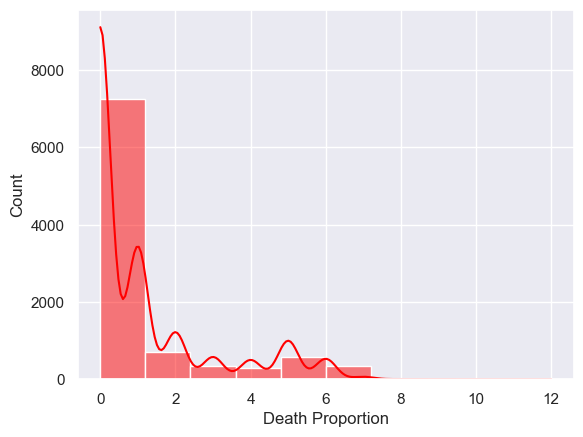

In [20]:
# Extreme values check for death proportion

# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")
sns.histplot(df_1['Death Proportion'], bins=10, kde = True, color="red") # shows extreme values for 'death'

<Axes: xlabel='Deaths', ylabel='Count'>

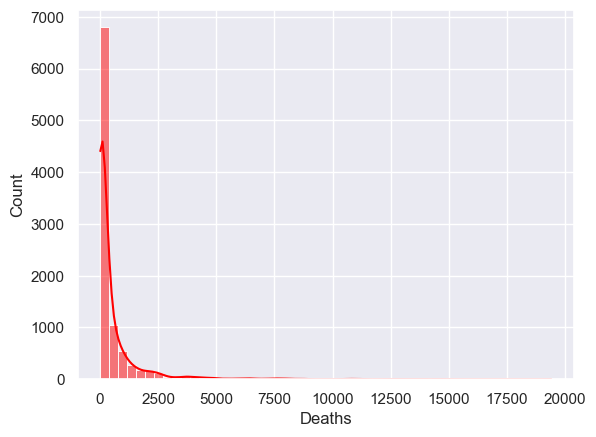

In [37]:
# Extreme values check for death proportion

# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")
sns.histplot(df_1['Deaths'], bins=00, kde = True, color="red") # shows extreme values for 'death'
             

### Plotting a Chloropleth

### Chloropleth - Death Proportion

In [21]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df_1[['State','Death Proportion']]
data_to_plot.head()

,State,Death Proportion
0,Alabama,0
1,Alabama,1
2,Alabama,0
3,Alabama,1
4,Alabama,1


In [25]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Death Proportion'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Death Toll in Proportion").add_to(map)

folium.LayerControl().add_to(map)

map

In [23]:
map.save('plot_data.html')

### Chloropleth - Deaths

In [26]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot1 = df_1[['State','Deaths']]
data_to_plot1.head()

,State,Deaths
0,Alabama,10
1,Alabama,10
2,Alabama,13
3,Alabama,11
4,Alabama,10


In [28]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['State', 'Deaths'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Death Toll").add_to(map)

folium.LayerControl().add_to(map)

map

### Questions

#### Does the analysis answer any of your existing research questions?

Yes, It answers my question "Does the geographic location increase the risk of death from diseases of the circulatory system?"

As noted some states have higher death tolls than others

#### Does the analysis lead you to any new research questions?

Yes, the question then becomes why do other states have higher death tolls than others?
Could it be the age of the population? Does age increases the risk of death from circulatory diseases?